In [1]:
import hmftpy as hmf
from hmftpy.plaquettes.square import plaq4, plaq4_os
from hmftpy.operators import mf_ops, inner_hamiltonian, periodic_hamiltonian
from hmftpy import do_hmft
from hmftpy.hmf import get_mfs
from hmftpy.plot_spins import draw_tri_lattice, draw_cluster, plot_spins
from quspin.basis import spin_basis_1d
from quspin.operators import quantum_operator
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

plaq = plaq4
L = 4
basis = spin_basis_1d(L, pauli=0)

maxit = 200

steps = 50

In [2]:
def couplings(J2):
    interactions = {'nearest': {'xx': 1, 'yy': 1, 'zz': 1},
                    'n_nearest': {'xx': J2, 'yy': J2, 'zz': J2}}
    return interactions

In [3]:
J2s = np.linspace(0, 1.5, steps)
energies = np.zeros(steps)
cvgs = [False for i in range(steps)]
energies_r= np.zeros(steps)
cvgs_r = [False for i in range(steps)]
energies_o = np.zeros(steps)
energies_p = np.zeros(steps)

mfs = []
mf_rs = []

In [4]:
mf0 = None
for i, J2 in enumerate(tqdm(J2s, ascii=True)):
    interactions = couplings(J2)
    if J2 < 0.75:
        energies[i], v, mf0, cvgs[i] = do_hmft(plaq, interactions, basis, 
                                               max_iter=maxit, mf0=mf0, rescale_e=False)
        mfs += [mf0]
    ho = inner_hamiltonian(plaq4, interactions, basis)
    eo, vo = ho.eigsh(k=1, which='SA')
    energies_o[i] = eo[0]

100%|##########| 50/50 [00:32<00:00,  1.52it/s]


In [5]:
mf0 = None
for i, J2 in enumerate(tqdm(J2s[::-1], ascii=True)):
    interactions = couplings(J2)
    if J2 > 0.65:
        energies_r[steps-i-1], v, mf0, cvgs[steps-i-1] = do_hmft(plaq, interactions, basis, 
                                                                 max_iter=maxit, mf0=mf0, rescale_e=False)
        mf_rs += [mf0]

100%|##########| 50/50 [00:01<00:00, 34.73it/s]


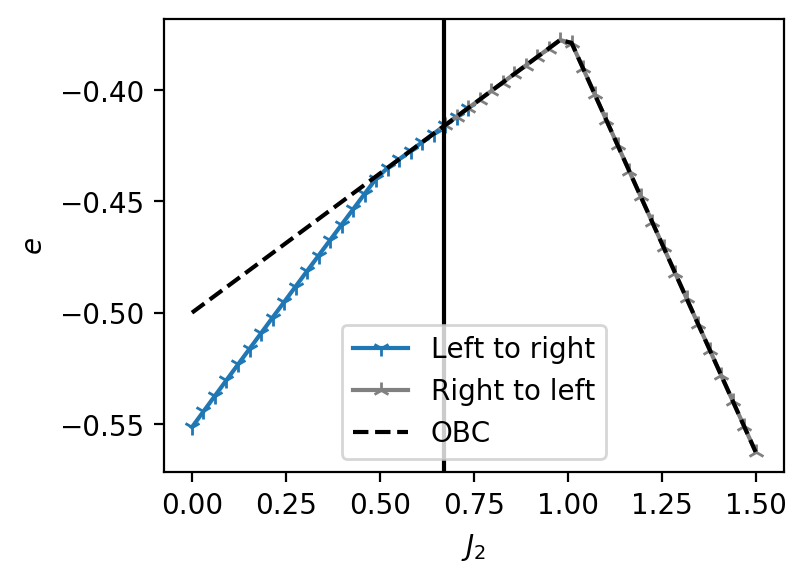

In [6]:
plt.figure(figsize=(4,3), dpi=200)

plt.plot(J2s[energies != 0], .5*energies[energies != 0]/4, label='Left to right', marker='1')
plt.plot(J2s[energies_r != 0], .5*energies_r[energies_r != 0]/4, label='Right to left', marker='2', color='gray')
plt.plot(J2s, .5*energies_o/4, label='OBC', zorder=10, ls='--', color='black')
plt.axvline(.67, color='black')
plt.xlabel('$J_2$')
plt.ylabel('$e$')
plt.legend()

/Users/wholdhus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/wholdhus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


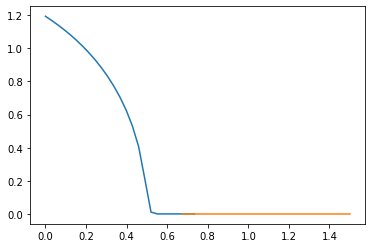

In [7]:
plt.plot(J2s[J2s < 0.75], [np.sum([(-1)**i*mf['z'][i] for i in range(L)]) for mf in mfs])
plt.plot(J2s[J2s > 0.65], [np.sum([(-1)**i*mf['z'][i] for i in range(L)]) for mf in mf_rs[::-1]])
